# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**: Guilherme Fernandes Rezende Santos

**RA**: 813467


---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

##### Importando as bibliotecas que serão usadas nessa etapa

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Prepara o DF dos dados do treinamento

In [3]:
dados_treino = pd.read_csv('./data/train.csv')
dados = pd.read_csv('./data/RHP_data.csv')

dados_treino = dados.merge(dados_treino, on='Id', how='right')

display(dados_treino.head(10))


,Id,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,...,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE
0,10524,28.0,123,19.0,11/07/05,13/12/99,5.79,SB,Normais,110.0,...,HAS-1 PAD,Normal,ausente,100,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia,Normal
1,17249,32.0,0,NaN,12/02/04,10/06/92,12.11,GS,Normais,100.0,...,Não Calculado,Normal,Sistólico,100,Assintomático,NaN,Masculino,5 - Parecer cardiológico,NaN,Anormal
2,4483,13.0,87,17.0,22/12/03,05/11/01,2.21,SulAmerica,Normais,NaN,...,Não Calculado,Normal,Sistólico,100,Assintomático,NaN,M,6 - Suspeita de cardiopatia,6 - Sopro,Anormal
3,6830,11.0,0,NaN,11/12/06,26/05/05,1.6,SA,Normais,NaN,...,Não Calculado,Normal,ausente,100,NaN,NaN,F,1 - Cardiopatia já estabelecida,1 - Cardiopatia congenica,Normal
4,11652,42.4,136,23.0,23/03/01,03/03/01,0.06,NaN,Normais,100.0,...,Não Calculado,Normal,ausente,78,Assintomático,NaN,F,5 - Parecer cardiológico,NaN,Normal
5,15430,45.0,161,17.0,12/06/03,15/02/96,7.6,UR,Normais,120.0,...,HAS-1 PAS,Normal,ausente,80,Assintomático,NaN,M,5 - Parecer cardiológico,5 - Cirurgia,Normal
6,1023,18.5,105,17.0,29/03/05,14/06/01,3.93,SA,Normais,90.0,...,Normal,Normal,ausente,92,NaN,NaN,F,7 - Outro,Outro,Normal
7,5733,12.0,0,NaN,04/07/06,06/03/05,1.38,UR,Normais,NaN,...,Não Calculado,Normal,ausente,100,NaN,NaN,F,1 - Cardiopatia já estabelecida,1 - Cardiopatia congenica,Normal
8,14309,24.0,112,19.0,15/04/04,18/03/99,5.27,Camed,Normais,100.0,...,Normal,Normal,ausente,100,Outro,NaN,M,6 - Suspeita de cardiopatia,6 - HAS/dislipidemia/obesidade,Normal
9,3437,17.0,100,17.0,40136,38926,3.44,CAMED,Normais,NaN,...,Não Calculado,Normal,ausente,92,Assintomático,NaN,M,5 - Parecer cardiológico,5 - Cirurgia,Normal


##### Após o carregamento dos dados, será estudado a análise de cada atributo

* Peso: representa o peso, em Kg, de cada indivíduo.

* Altura: representa a altura, em cm, de cada indivíduo.

* IMC: representa o índice de massa corporal do paciente, índice que representa se o paciente estáem seu peso ideal ou não. É calculado pelo peso (em metros) dividido pela altura elevada ao quadrado.

* Atendimento: indica a data em que foi feito o atendimento do paciente.

* DN: data em que a declaração de nascido vivo do paciente foi escrita.

* Idade: representa a idade do paciente, sendo os anos representados por um valor real.

* Convênio: Indica qual o convênio do cliente.

* Pulsos: Indica a qualidade da circulação arterial. Pulsos fracos ou ausentes podem sugerir problemas como obstrução arterial ou insuficiência cardíaca.

* PA Sistolica: valor mais alto (medido em mmHg) que aparece durante uma aferição de pressão. Representa a pressão exercida nas artérias durante a contração do coração (sístole). Valores elevados indicam hipertensão arterial, enquanto valores muito baixos podem sugerir hipotensão.

* PA Diastolica: valor mais baixo (medido em mmHg) que aparece durante uma aferição de pressão. Reflete a pressão arterial durante o relaxamento do coração (diástole). É usada junto com a PA sistólica para diagnosticar hipertensão.

* PPA (Pressão de Pulso Arterial): Diferença entre a pressão arterial sistólica e diastólica. Indica a rigidez arterial. Valores elevados podem estar associados a doenças cardiovasculares.

* B2: Segundo Ruído Cardíaco, representa o som do fechamento das válvulas aórtica e pulmonar. Alterações no B2 podem sugerir problemas como hipertensão pulmonar ou doenças valvares.

* Sopro: Presença de ruídos anormais detectados durante a ausculta cardíaca. Pode indicar problemas como regurgitação ou estenose valvar.

* FC (Frequência Cardíaca): número de batimentos cardíacos por minuto (bpm). Frequências muito altas (taquicardia) ou baixas (bradicardia) podem indicar problemas cardíacos ou metabólicos.

* HDA1 (Histórico de doenças atual 1): informações detalhadas sobre o principal problema clínico atual.

* HDA2 (Histórico de doenças atual 2): informações adicionais sobre o problema clínico ou outras condições associadas.

* Sexo: genêro biológico do paciente.

* Motivo 1: principal razão para a consulta.

* Motivo 2: razão secundária para a consulta.

##### Medidas descritivas dos dados

In [4]:
display(dados_treino.describe(include='all'))

,Id,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,...,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE
count,14727.000000,14467.000000,14727.000000,10710.000000,13744,13351,13351,10234,13535,8232.000000,...,14530,13550,13562,12832,10113,539,14724,13654,10668,13559
unique,NaN,NaN,NaN,NaN,2063,6007,1927,407,7,NaN,...,9,5,7,119,8,8,6,5,16,3
top,NaN,NaN,NaN,NaN,26/05/09,09/05/04,0.01,GS,Normais,NaN,...,Não Calculado,Normal,ausente,80,Assintomático,Palpitacao,M,5 - Parecer cardiológico,5 - Cirurgia,Normal
freq,NaN,NaN,NaN,NaN,27,20,165,2221,13395,NaN,...,7370,12951,8723,2004,7514,126,7253,6492,3429,8137
mean,8946.345013,20.979374,82.971209,17.792437,NaN,NaN,NaN,NaN,NaN,101.395773,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5167.713313,18.189793,57.028885,11.214492,NaN,NaN,NaN,NaN,NaN,14.995826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,-40.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,10.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4458.500000,6.000000,0.000000,15.000000,NaN,NaN,NaN,NaN,NaN,90.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,8926.000000,17.500000,98.000000,17.000000,NaN,NaN,NaN,NaN,NaN,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,13442.500000,31.000000,130.000000,19.000000,NaN,NaN,NaN,NaN,NaN,110.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Correção de 'Normais' por 'Normal'
Antes de plotar os gŕaficos, farei uma pequena substituição em uma amostra específica, apenas para corrigir a classe de normais para normal, afim de tornar o gráfico menos variado

In [5]:
x  = dados_treino['CLASSE'] == 'Normais'

dados_treino.loc[x, 'CLASSE'] = 'Normal'

##### Plotando os Gráficos

Gráfico de distribuição em relação ao motivo1 da visita e a condição do paciente

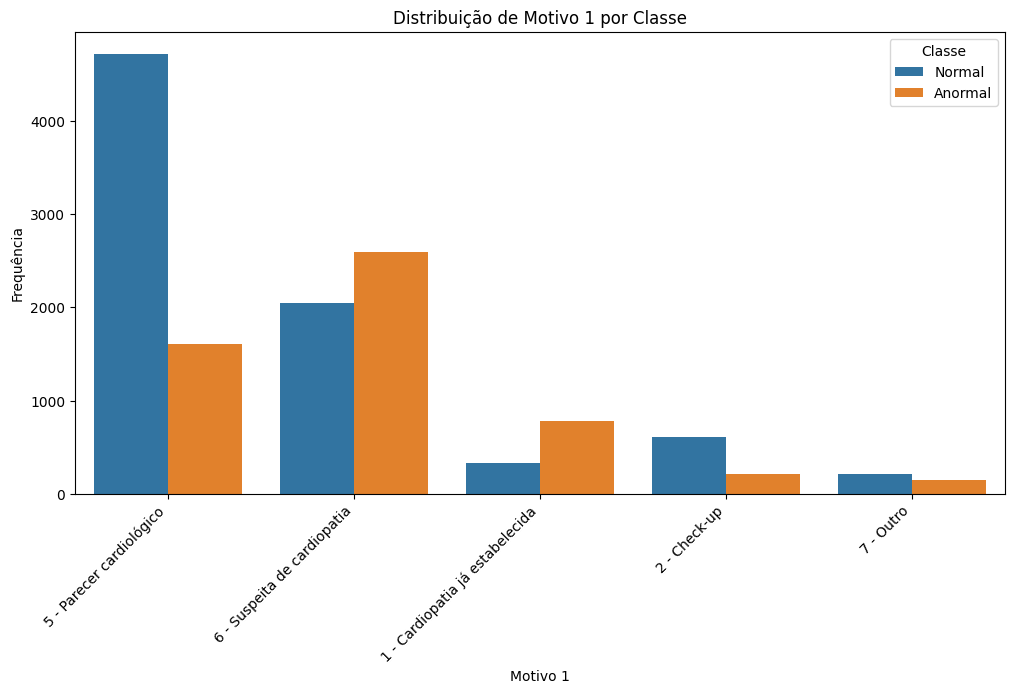

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dados_treino, x='MOTIVO1', hue='CLASSE',
              order=dados_treino['MOTIVO1'].value_counts().index)
plt.xlabel('Motivo 1')
plt.ylabel('Frequência')
plt.title('Distribuição de Motivo 1 por Classe')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classe')
plt.show()



Gráfico de distribuição em relação ao motivo 2 da visita e a condição do paciente

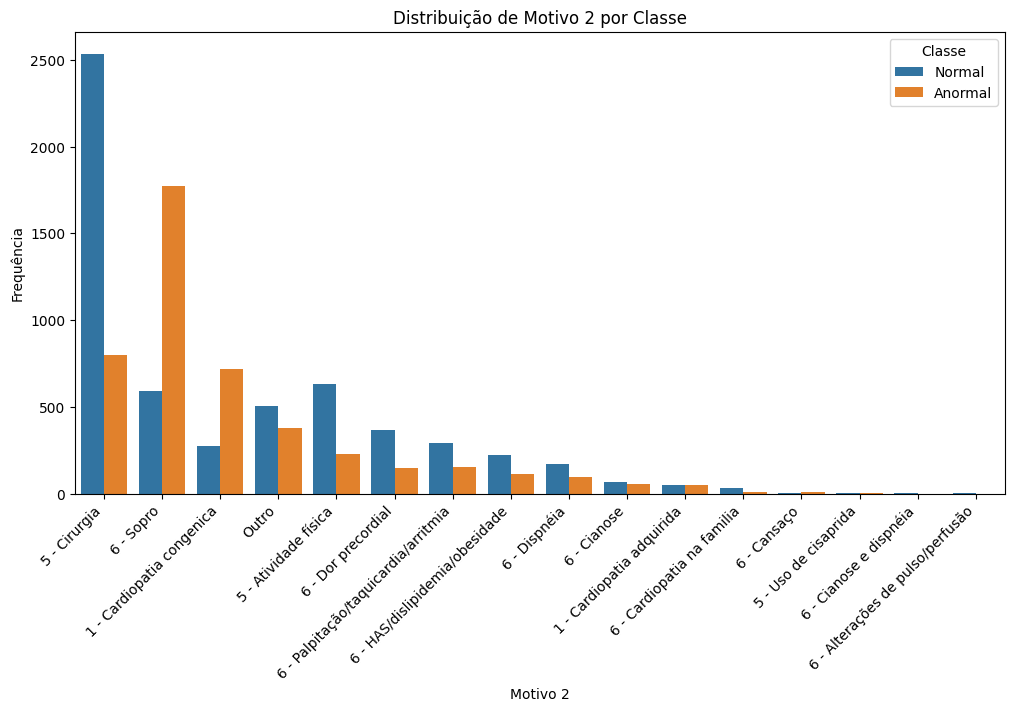

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dados_treino, x='MOTIVO2', hue='CLASSE',
              order=dados_treino['MOTIVO2'].value_counts().index)
plt.xlabel('Motivo 2')
plt.ylabel('Frequência')
plt.title('Distribuição de Motivo 2 por Classe')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classe')
plt.show()

Gráfico de distribuição em relação ao HD1 do paciente e a classe

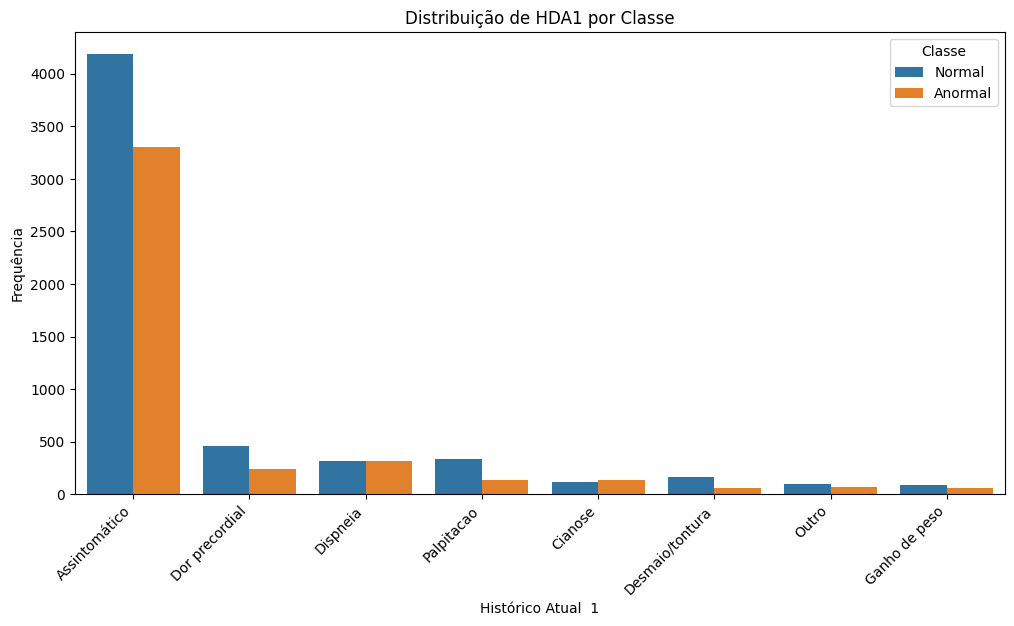

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dados_treino, x='HDA 1', hue='CLASSE',
              order=dados_treino['HDA 1'].value_counts().index)
plt.xlabel('Histórico Atual  1')
plt.ylabel('Frequência')
plt.title('Distribuição de HDA1 por Classe')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classe')
plt.show()


Gráfico de distribuição em relação ao HD2 do paciente e a classe

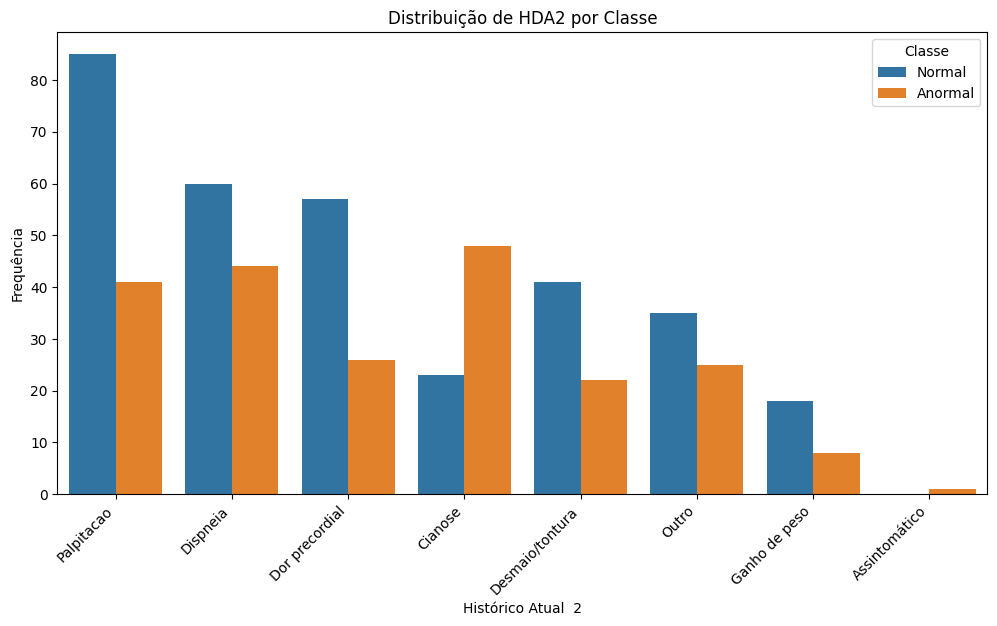

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dados_treino, x='HDA2', hue='CLASSE',
              order=dados_treino['HDA2'].value_counts().index)
plt.xlabel('Histórico Atual  2')
plt.ylabel('Frequência')
plt.title('Distribuição de HDA2 por Classe')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classe')
plt.show()


Gráfico de distribuição em relação à condição de sopro do paciente e a classe

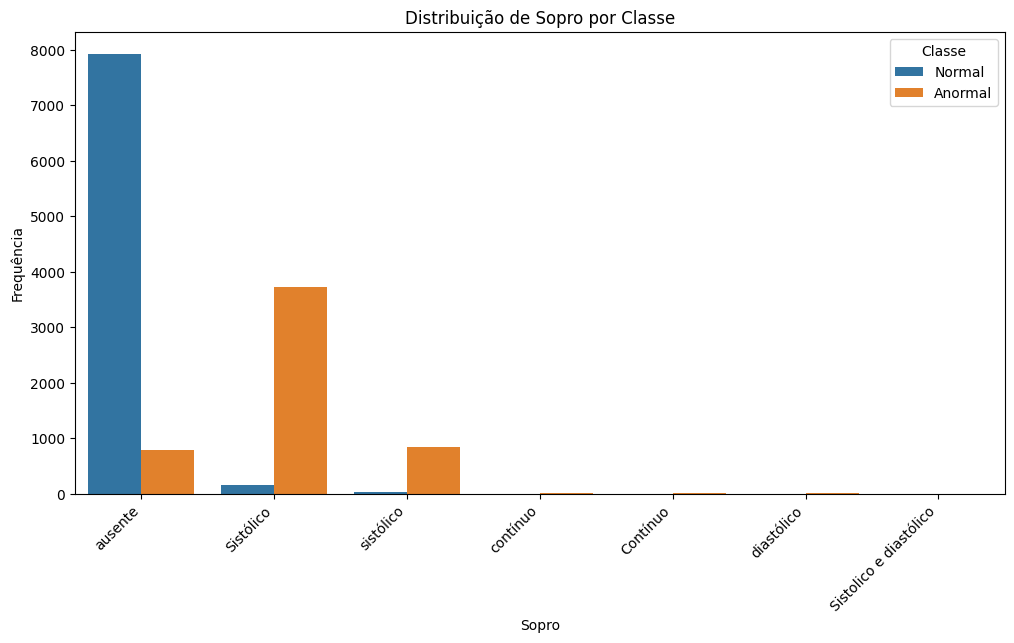

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dados_treino, x='SOPRO', hue='CLASSE',
              order=dados_treino['SOPRO'].value_counts().index)
plt.xlabel('Sopro')
plt.ylabel('Frequência')
plt.title('Distribuição de Sopro por Classe')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classe')
plt.show()

Gráfico de distribuição em relação ao B2 do paciente e a classe

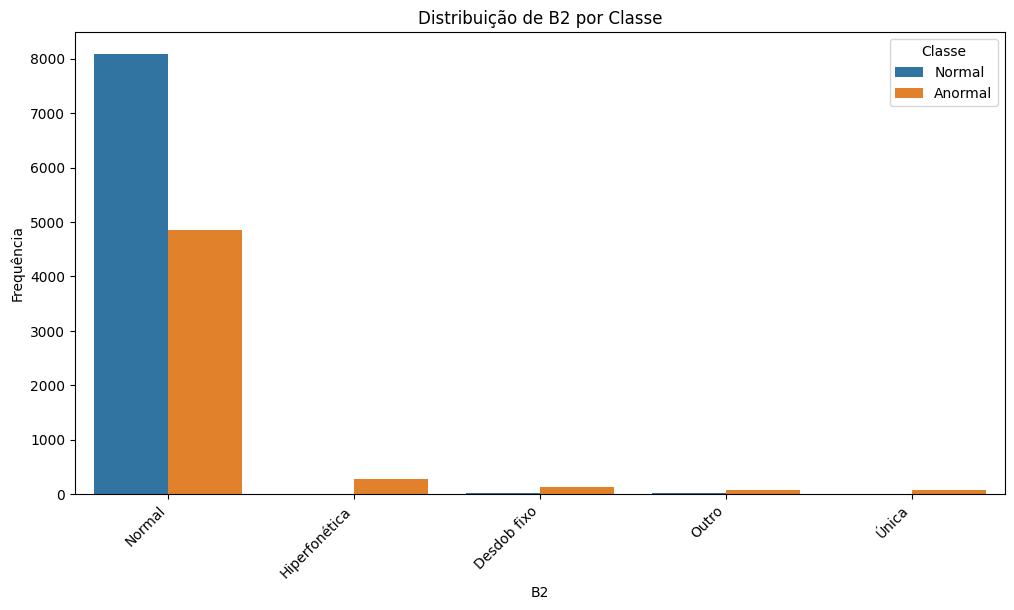

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dados_treino, x='B2', hue='CLASSE',
              order=dados_treino['B2'].value_counts().index)
plt.xlabel('B2')
plt.ylabel('Frequência')
plt.title('Distribuição de B2 por Classe')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classe')
plt.show()

Gráfico de distribuição em relação ao PPA do paciente e a classe

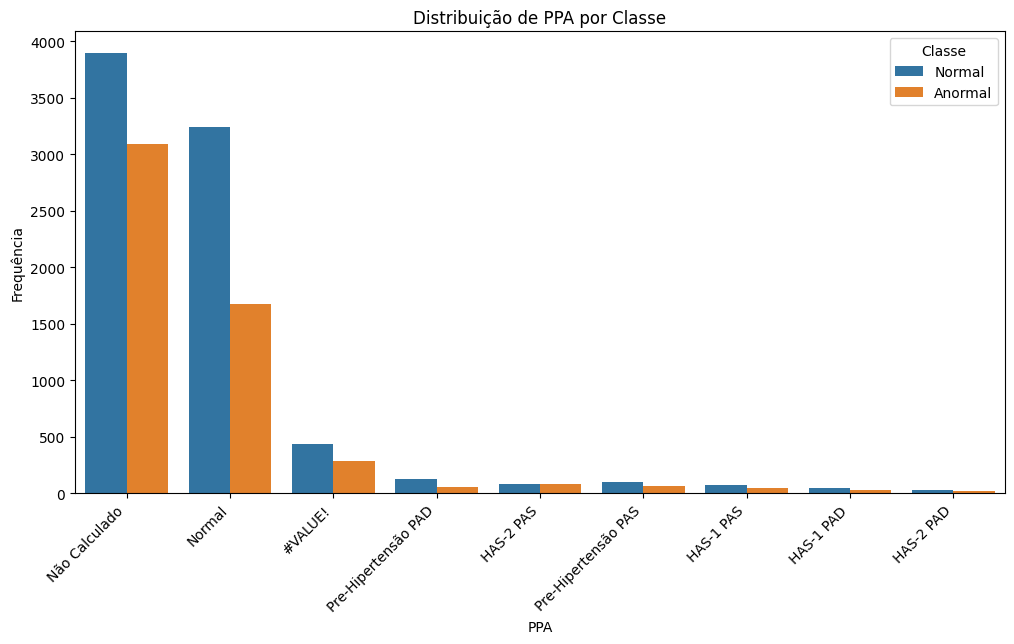

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dados_treino, x='PPA', hue='CLASSE',
              order=dados_treino['PPA'].value_counts().index)
plt.xlabel('PPA')
plt.ylabel('Frequência')
plt.title('Distribuição de PPA por Classe')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classe')
plt.show()

Gráfico de distribuição em relação ao Pulso do paciente e a classe

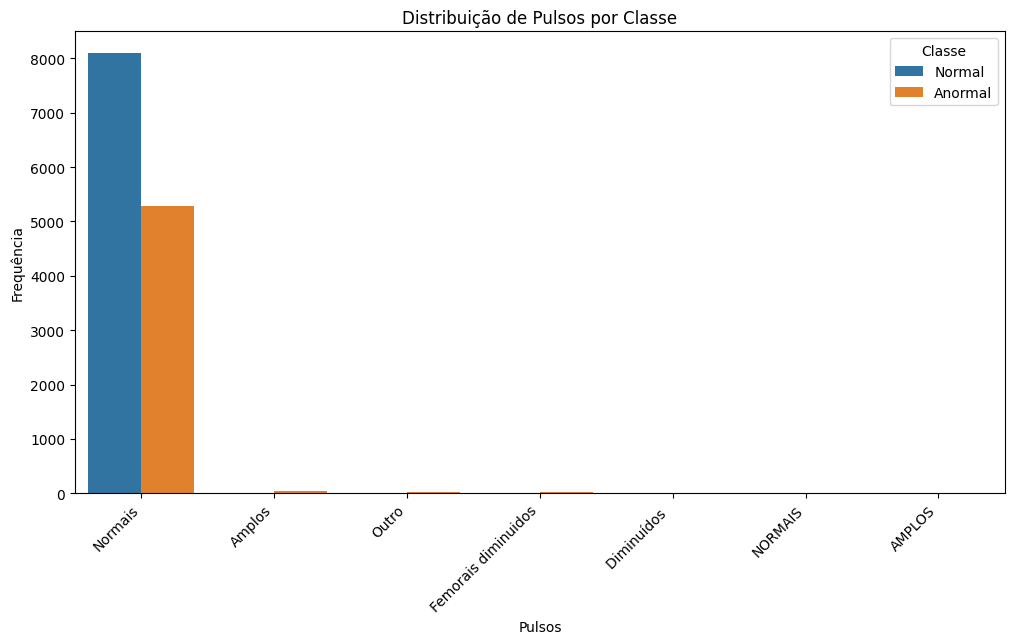

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dados_treino, x='PULSOS', hue='CLASSE',
              order=dados_treino['PULSOS'].value_counts().index)
plt.xlabel('Pulsos')
plt.ylabel('Frequência')
plt.title('Distribuição de Pulsos por Classe')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classe')
plt.show()

##### Plotagem de gráficos boxplots para colunas numéricas. Tendo como objetivo a identificação de outliers

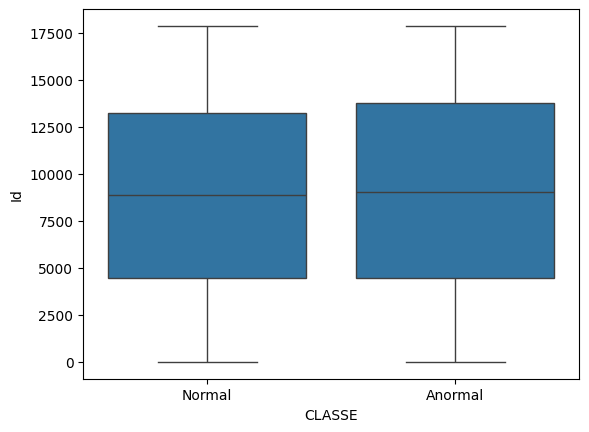

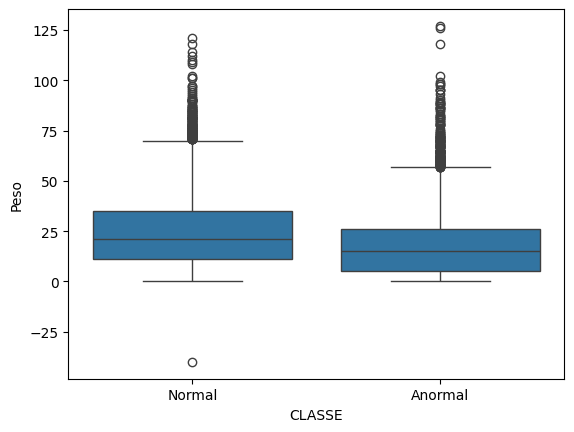

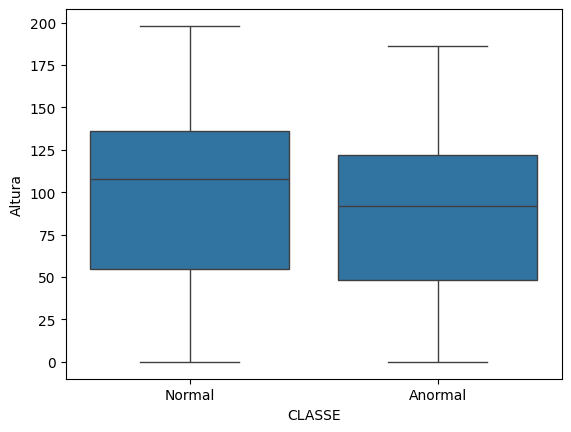

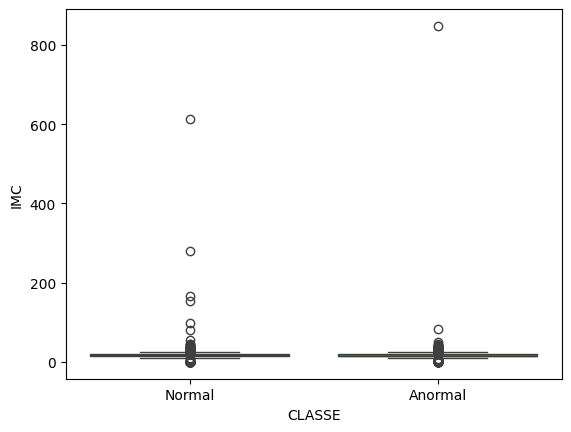

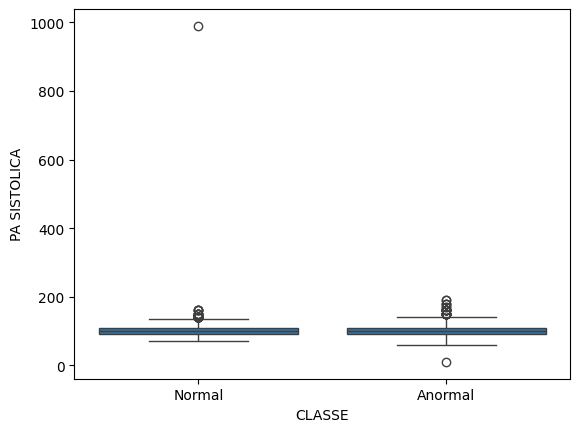

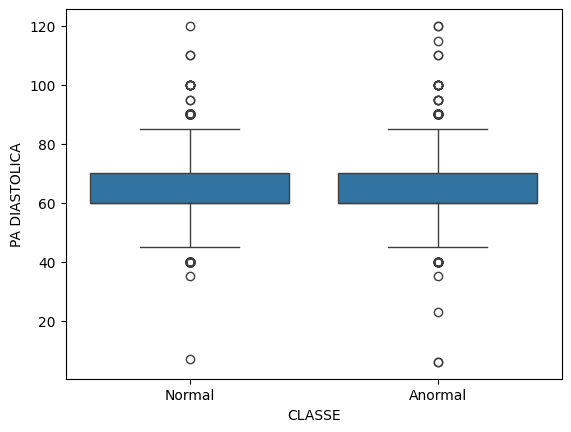

In [44]:
colunas_numericas = dados_treino.select_dtypes(include='number').columns

for atributo in colunas_numericas:
  plt.Figure(figsize=(8,8))

  sns.boxplot(x = 'CLASSE', y = atributo, data = dados_treino, whis=1.5)

  plt.show()

##### Insights obtidos após obeservação e análise dos gráficos

* No motivo 1 para a visita, uma parte considerável dos pacientes que possuem parecer cardiológico e suspeita de cardiopatia possuem alguma anormalidade.

* No motivo 2 para a visita, uma parte considerável dos pacientes que tem como motivo cirurgia, sopro e cardiopatia congenica possuem alguma anormalidade. Com atenção especial voltada para o sopro, pois cerca de <strong>72%</strong>  daqueles que possuem sopro como condição possuem alguma anormalidade.

* No histórico de doença atual 2, todos os diferentes valores possuem uma parcela considerável de pacientes com anormalidade, assim não pode-se desconsiderar nenhum deles.

* Em SOPRO,é necessário padronizar os valores, visto que há diferentes valores que representam a mesma coisa, como Sistólico e sistólico, o mesmo ocorre com o atributo pulso.

* Há a existência de outliners a serem tratados, como mostrado pelo gráfico boxplot.

* Além dos outliers, é necessário tratar diversos casos de ruído, como #VALUE em PPA

---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.